<a href="https://colab.research.google.com/github/RitikArora24/Regression-on-Car-Fuel-consumption/blob/main/Car_price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn import metrics

In [8]:
car_dataset = pd.read_csv("/content/car data.csv")

In [9]:
car_dataset.head(5)

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [12]:
car_dataset.shape

(301, 9)

In [14]:
car_dataset.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [17]:
car_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [19]:
car_dataset.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [29]:
print(car_dataset.Fuel_Type.value_counts())
print(car_dataset.Seller_Type.value_counts())
print(car_dataset.Transmission.value_counts())

Petrol    239
Diesel     60
CNG         2
Name: Fuel_Type, dtype: int64
Dealer        195
Individual    106
Name: Seller_Type, dtype: int64
Manual       261
Automatic     40
Name: Transmission, dtype: int64


## Preprocessing

## Encoding categorical data

In [30]:
#encoding "fuel_type" colmn
car_dataset.replace({"Fuel_Type":{'Petrol':0,'Diesel':1,'CNG':2}}, inplace=True)
car_dataset.replace({"Seller_Type":{'Dealer':0,'Individual':1}}, inplace=True)
car_dataset.replace({"Transmission":{'Manual':0,'Automatic':1}}, inplace=True)

In [31]:
car_dataset

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,0,0,0,0
1,sx4,2013,4.75,9.54,43000,1,0,0,0
2,ciaz,2017,7.25,9.85,6900,0,0,0,0
3,wagon r,2011,2.85,4.15,5200,0,0,0,0
4,swift,2014,4.60,6.87,42450,1,0,0,0
...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,1,0,0,0
297,brio,2015,4.00,5.90,60000,0,0,0,0
298,city,2009,3.35,11.00,87934,0,0,0,0
299,city,2017,11.50,12.50,9000,1,0,0,0


<ipython-input-35-19e912405a1f>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = car_dataset.corr()


                   Year  Selling_Price  Present_Price  Kms_Driven  Fuel_Type  \
Year           1.000000       0.236141      -0.047584   -0.524342   0.053643   
Selling_Price  0.236141       1.000000       0.878983    0.029187   0.509467   
Present_Price -0.047584       0.878983       1.000000    0.203647   0.440415   
Kms_Driven    -0.524342       0.029187       0.203647    1.000000   0.166801   
Fuel_Type      0.053643       0.509467       0.440415    0.166801   1.000000   
Seller_Type   -0.039896      -0.550724      -0.512030   -0.101419  -0.352415   
Transmission  -0.000394       0.367128       0.348715    0.162510   0.080466   
Owner         -0.182104      -0.088344       0.008057    0.089216  -0.055705   

               Seller_Type  Transmission     Owner  
Year             -0.039896     -0.000394 -0.182104  
Selling_Price    -0.550724      0.367128 -0.088344  
Present_Price    -0.512030      0.348715  0.008057  
Kms_Driven       -0.101419      0.162510  0.089216  
Fuel_Type     

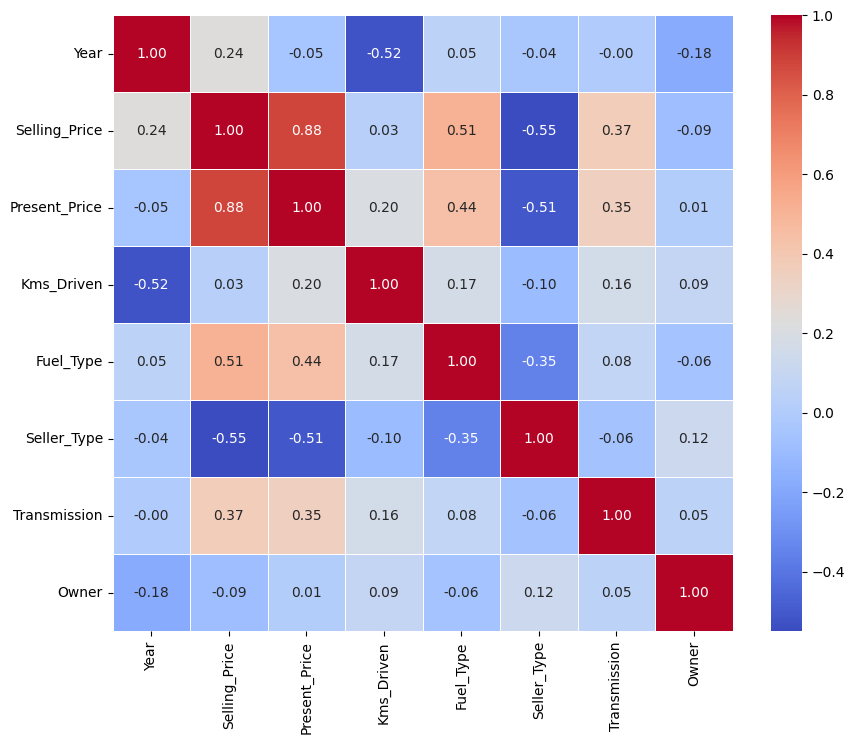

In [35]:
correlation_matrix = car_dataset.corr()
print(correlation_matrix)
plt.figure(figsize=(10,8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.show()

## train test split

In [37]:
X = car_dataset.drop(['Car_Name','Selling_Price'], axis=1)
Y = car_dataset['Selling_Price']

In [38]:
print(Y)

0       3.35
1       4.75
2       7.25
3       2.85
4       4.60
       ...  
296     9.50
297     4.00
298     3.35
299    11.50
300     5.30
Name: Selling_Price, Length: 301, dtype: float64


Splitting the dataset

In [39]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.1, random_state=2)

Model Training

1. Linear regression model

In [40]:
LR = LinearRegression()
LR.fit(X_train,Y_train)

LinearRegression()

Model Evaluation

In [41]:
training_data_prediction = LR.predict(X_train)

R square error

In [42]:
error_score=metrics.r2_score(Y_train, training_data_prediction)
print("R2 error is:",error_score)

R2 error is: 0.8799451660493711


Visualizing actual prices and predicted prices

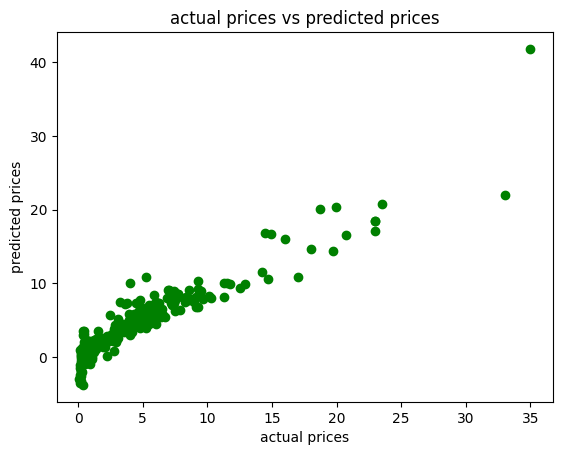

In [47]:
plt.scatter(Y_train, training_data_prediction, c='green')
plt.xlabel("actual prices")
plt.ylabel("predicted prices")
plt.title("actual prices vs predicted prices")
plt.show()

In [49]:
#prediction on testing data
test_data_prediction = LR.predict(X_test)

In [50]:
# R squre error
error_score = metrics.r2_score(Y_test,test_data_prediction)
print("R2 sq error :", error_score)

R2 sq error : 0.8365766715027051



R2
  score of 0.8365766715027051 indicates that approximately 83.66% of the variance in the dependent variable (target variable) is predictable from the independent variables (features) in the regression model.

In other words, the model explains about 83.66% of the variability observed in the target variable. This suggests that the model has a good level of explanatory power and fits the data reasonably well.

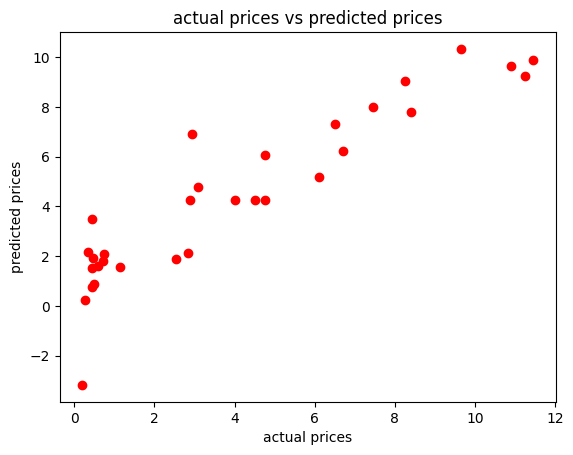

In [51]:
plt.scatter(Y_test, test_data_prediction, c='red')
plt.xlabel("actual prices")
plt.ylabel("predicted prices")
plt.title("actual prices vs predicted prices")
plt.show()

2. Lasso Regression

In [52]:
Lasso_Reg = Lasso()
Lasso_Reg.fit(X_train,Y_train)

Lasso()

Model Evaluation

In [53]:
training_data_prediction = Lasso_Reg.predict(X_train)

R square error

In [54]:
error_score=metrics.r2_score(Y_train, training_data_prediction)
print("R2 error is:",error_score)

R2 error is: 0.8427856123435794


Visualizing actual prices and predicted prices

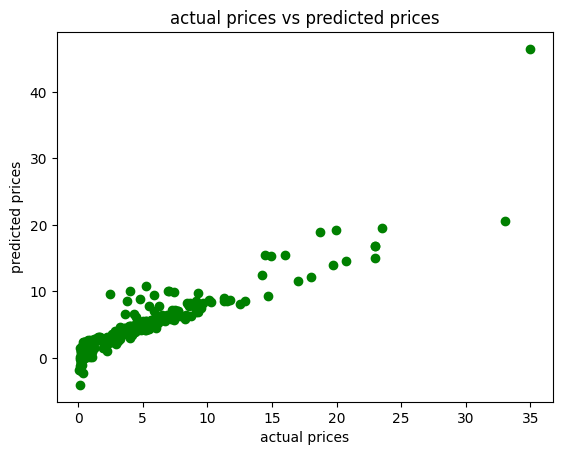

In [55]:
plt.scatter(Y_train, training_data_prediction, c='green')
plt.xlabel("actual prices")
plt.ylabel("predicted prices")
plt.title("actual prices vs predicted prices")
plt.show()

In [56]:
#prediction on testing data
test_data_prediction = Lasso_Reg.predict(X_test)

In [57]:
# R squre error
error_score = metrics.r2_score(Y_test,test_data_prediction)
print("R2 sq error :", error_score)

R2 sq error : 0.8709167941173195


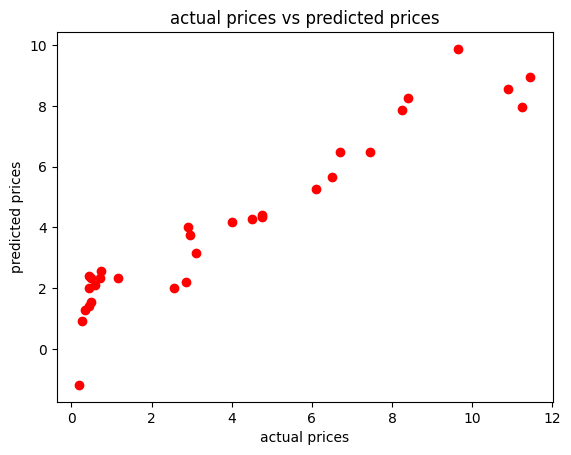

In [58]:
plt.scatter(Y_test, test_data_prediction, c='red')
plt.xlabel("actual prices")
plt.ylabel("predicted prices")
plt.title("actual prices vs predicted prices")
plt.show()